<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/LogisticRegressionLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)


data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


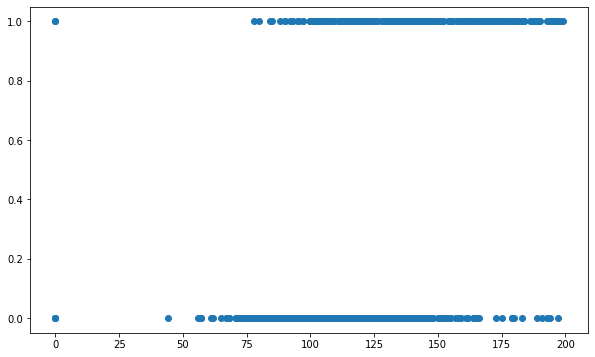

In [3]:
# Visualizing the dataset
plt.scatter(data['Glucose'], data['Outcome'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Glucose'], data['Outcome'], test_size=0.20)

In [5]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

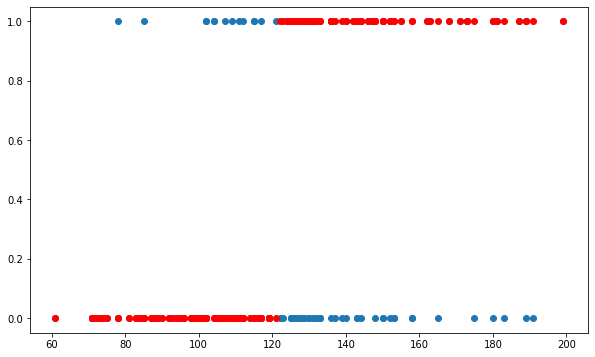

Accuracy = 0.6363636363636364


In [6]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
# X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
# plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


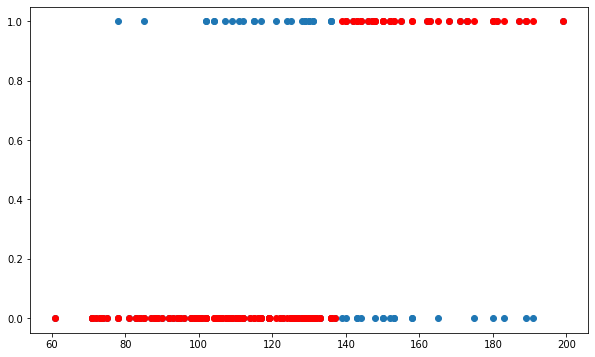

Accuracy = 0.7077922077922078


In [7]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")